<a href="https://colab.research.google.com/github/BogereMark879/Bogere-mark/blob/main/tour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
# Reading the file
df = pd.read_csv("/content/drive/MyDrive/tourism_attractions.csv")
#Reading the first five records
df.head()


,item_id,name,location,experience_tags,features,description
0,1,Bwindi Forest National Park,South western Uganda on edge of the rift valley,"Gorilla trekking, terrestrial animals, water s...","Mountain gorilla trekking, birding, indigenous...","Ranked among the top attractions in Uganda, Bw..."
1,2,Queen Elizabeth National Park,South western Uganda,"Terrestrial animals, aquatic animals, beautifu...","Tree climbing lions, floating hippopotamus, ch...",This is Uganda's most popular destination with...
2,3,Murchison Falls National Park,Mid eastern Uganda,"Terrestrial animals, water sports","Water falls, boat riding to foot of water fall...",This is Uganda's largest and oldest conservati...
3,4,Source of the Nile River,South eastern Uganda,"Water sports, beautiful scenery, cultural inst...","Source of world's second longest river, Nile r...",The world's second longest river is found in A...
4,5,Kibale Forest National Park,Western Uganda,"Terrestrial animals, bird watching","World's primate capital, chimpanzees endangere...",This is one of the loveliest and most varied t...


In [2]:
#Checking the shape of the file
df.shape

(15, 6)

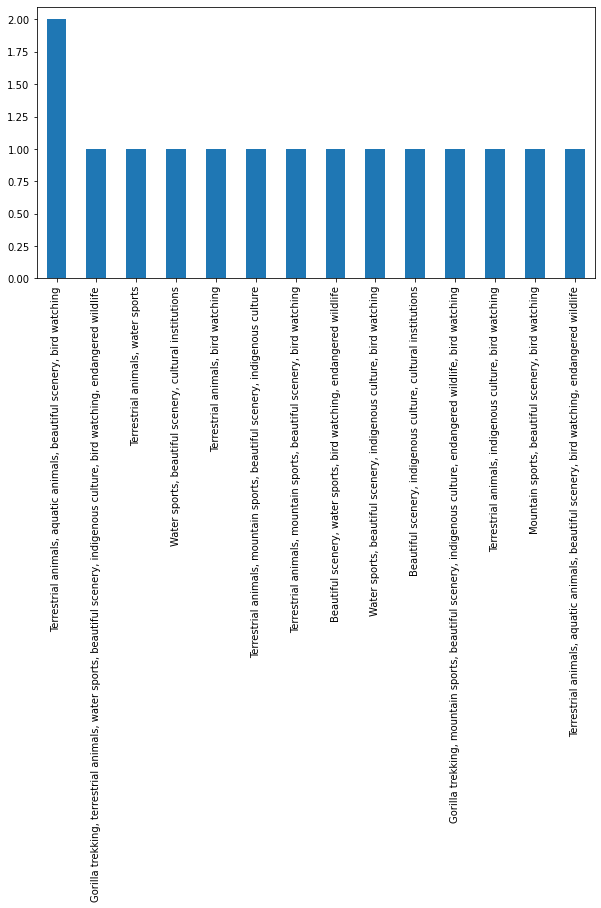

In [3]:
#Location distribution
df['experience_tags'].value_counts().plot(x = 'location', y ='count', kind = 'bar', figsize = (10,5)  )

In [4]:
# Printing the tour name and experience_tags randomly
df['name'] 
df['description']

0     Ranked among the top attractions in Uganda, Bw...
1     This is Uganda's most popular destination with...
2     This is Uganda's largest and oldest conservati...
3     The world's second longest river is found in A...
4     This is one of the loveliest and most varied t...
5     Uganda's most isolated national park located i...
6     The alpine highland graciers, snowfields and b...
7     This is Africa's largest lake shared by three ...
8     Many tourists and travelers who undertake a Go...
9     Kasubi tombs, Mengo Palace, Bahai Temple, Ugan...
10                                                  NaN
11    Lake Mburo National Park is a compact gem, loc...
12    While Semuliki’s species have been accumulatin...
13    At 4,000km²  Mt. Elgon has the largest volcani...
14    Mount Elgon National Park is home to over 300 ...
Name: description, dtype: object

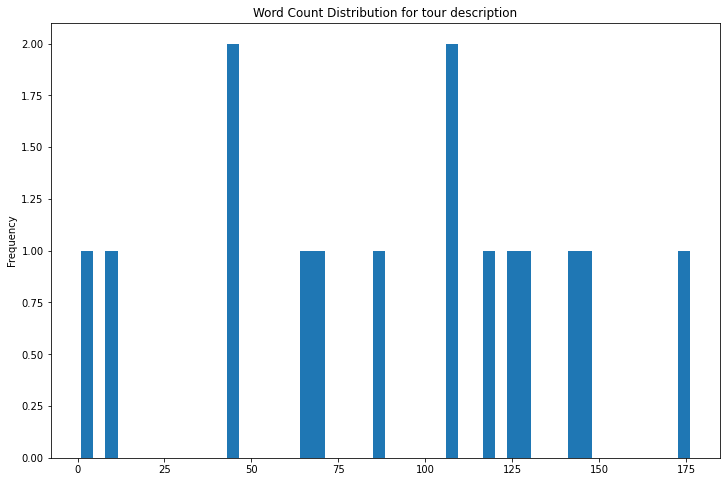

In [5]:
# Calculating the word count for book description
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for tour description')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


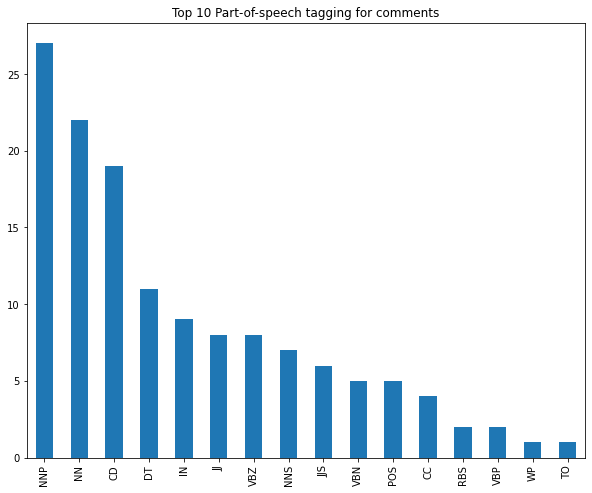

In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob
blob = TextBlob(str(df['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 10 Part-of-speech tagging for comments")

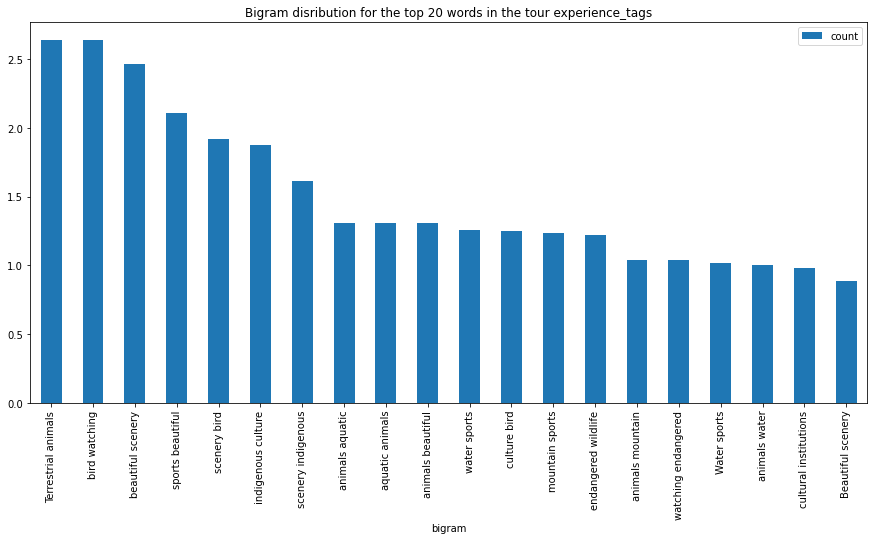

In [7]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['experience_tags'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the tour experience_tags", figsize = (15,7), )

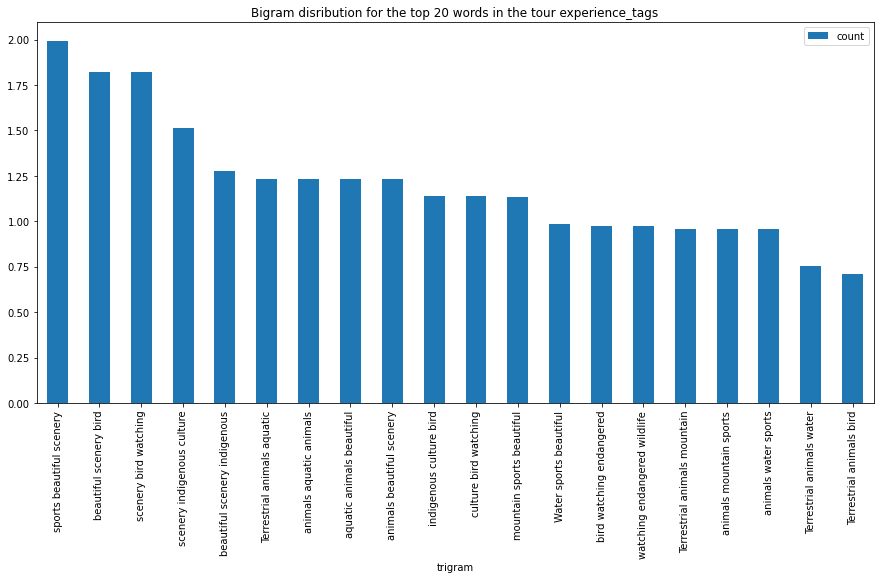

In [8]:
#Converting text exterience_tags into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['experience_tags'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the tour experience_tags", figsize = (15,7), )

In [9]:
# Function for removing NonAscii characters
import nltk
nltk.download('stopwords')
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['experience_tags'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Function for recommending books based on tour name. It takes tour name and experience_tags as an input.
def recommend(name, experience_tags):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['experience_tags'] == experience_tags]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['name'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['name'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_name
       
    idx = indices[name]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the tour
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
# Scores of the 5 most similar tour 
    sig = sig[1:6]
# tour indicies
    tour_indices = [i[0] for i in sig]
   
    # Top 5 tour recommendation
    rec = data[['name', 'experience']].iloc[tour_indices]
       
   
    
   